In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import operator as op

## Основные примечания по всему проекту

### Примечание 1. 
Во всех заданиях, кроме второго, ***покупками*** (или ***заказами***) считаются ***все уникальные orders***, которые приведены в таблице, и которые впоследствие ***были*** доставлены до адресата. Отмененные и недоступные заказы, а также те, что имеют пустое поле времени получения покупателем, не учитываются. Во втором же задании учитываются только приведенные в таблице заказы с ***пустым*** полем времени получения заказа покупателем.

### Примечание 2.
В таблице orders встречаются строки (всего их 23), в которых дата получения заказа покупателем оказывается меньше даты передачи заказа в службу доставки (причем в большинстве случаев это отличие довольно существенное - несколько дней), т. е. получается, что заказ сначала был получен покупателем, а потом уже передан в доставку. Тем не менее, такие случаи тоже будут считаются за покупки в ходе решения.

In [52]:
# Исследуем таблицу customers:

In [53]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [54]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [55]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [56]:
# Исследуем таблицу orders:

In [57]:
orders = pd.read_csv('olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_approved_at', \
                                                              'order_delivered_carrier_date', 'order_delivered_customer_date', \
                                                              'order_estimated_delivery_date'])

orders['month'] = orders['order_purchase_timestamp'].apply(lambda row: str(row.month_name()) + ' ' + str(row.year))

In [58]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October 2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July 2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August 2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November 2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February 2018


In [59]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
month                                    object
dtype: object

In [60]:
# Исследуем таблицу items:

In [61]:
items = pd.read_csv('olist_order_items_dataset.csv')

In [62]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [63]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

## ***Задание 1:***

In [64]:
orders[~orders['order_delivered_customer_date'].isna()] \
    .query('order_status not in ["canceled", "unavailable"]') \
    .merge(customers, on='customer_id') \
    .groupby('customer_unique_id', as_index=False)['order_id'] \
    .count() \
    .query('order_id == 1') \
    .rename(columns={'order_id':'total_orders'}) \
    .shape[0]

90549

***Ответ:*** 90.549 пользователей совершили покупку только один раз.

## ***Задание 2:***

#### Примечание 1. 
Недоставленным заказом считается order, у которого пустое поле получение заказа покупателем. После группировки
выяснилось, что некоторые заказы имеют статус "delivered", хотя в итоге покупателями получены не были. Эти и 
подобные случаи рассматриваются как ошибка в данных (в таблицу не была занесена информация о получении; произошел 
сбой сервера; покупатель не явился на получение и т. д.); но из-за ничтожного количества таких инцидентов результат 
не сильно меняется.

#### Примечание 2.
Считается, что хотя и данные предоставлены за 2016-2018 г. г., они рассматриваются на момент 2023 года, т. е. если
какой-либо заказ был сделан, в процессе не получил статуса "canceled" или "unavailable", но тем не менее не был
получен покупателем (поле order_delivered_customer_date пустое), то такой заказ так же считается недоставленным, ведь
было бы странно полагать, что order, сделанный, допустим, в 2016-м, все еще может находится в активной доставке, или
ждать своего покупателя в ПВЗ, например.

#### Примечание 3.
Доставленным заказом в этом и последующих заданиях считается такой order_id, у которого поле order_delivered_customer_date
***ненулевое***.

#### Примечание 4.
Считается, что все order_id уникальны (см. текст описания данных к таблице), и к каждому из таких уникальных order_id 
присвается один единственный статус, который для данного заказа не меняется с течением времени (по крайней мере в 
имеющихся данных).

In [65]:
# Доказательство:

orders.groupby('order_id', as_index=False)['order_status'] \
    .count() \
    .sort_values('order_status', ascending=False) \
    .head()

# Данные сгруппированы по уникальному order_id, и имеют только один статус на каждый заказ.

,order_id,order_status
0,00010242fe8c5a6d1ba2dd792cb16214,1
66279,ab291c01a71273689c1e6ea624b083dc,1
66301,ab344aaf7040ad7bcee8c7ae7db9e87e,1
66300,ab30f8d4ebb7d33d1dcf54d420ea42cd,1
66299,ab30f399d360ddf62897051d813f887d,1


In [66]:
failed_delivery_df = \
    orders[orders['order_delivered_customer_date'].isna()] \
    .groupby(['month', 'order_status'], as_index=False)['order_id'] \
    .nunique() \
    .groupby(['order_status'], as_index=False)['order_id'] \
    .mean() \
    .rename(columns={'order_id':'avg_failed_deliveries_per_month'}) \
    .sort_values('avg_failed_deliveries_per_month', ascending=False) 

failed_delivery_df['probable_reason_of_failed_delivery'] = [ \
                                                            'Заказ отгружен, но не доставлен', \
                                                            'Заказ отменен', \
                                                            'Заказ недоступен', \
                                                            'Для заказа выставлен счет, но сам заказ не доставлен', \
                                                            'Заказ в процессе сборки', \
                                                            'Заказ как бы доставлен, но не доставлен', \
                                                            'Заказ создан, но не доставлен', \
                                                            'Заказ оплачен, но не доставлен'
                                                           ]

### Описание результатов (сам датафрейм см. в ячейке ниже):

- Заказ отгружен, но не доставлен - исследование данных показало, что в 100% подобных случаев заказ был передан в 
службу доставки, но покупателем по итогу не получен. Возможно, информация о получении не была занесена в таблицу. 
Также может быть, что на стороне службы доставки возникли какие-либо проблемы.

- Заказ отменен - вина сервиса доставки отсутствует, исследование данных показало, что некоторые отмененные заказы были 
переданы в службу доставки, и затем отменены. Предположение о том, что заказы могли быть переданы в службу доставки
позже ожидаемой даты доставки (т. е. просрочены по вине сервиса; возможно покупатели заказывали товары к определенной 
дате, на праздник, например) не оправдалось.

- Заказ недоступен - исследование данных показало, что в данной ситуации в 100% случаев он не был перелан в службу доставки;
возможно что-то случилось по пути.

- Для заказа выставлен счет, но сам заказ не доставлен - та же ситуация, что и с "Заказ недоступен".

- Заказ в процессе сборки - та же ситуация, что и с "Заказ недоступен" (логично, что заказ не может быть в сборке вот 
уже несколько лет).

- Заказ как бы доставлен, но не доставлен - замечено всего 8 таких случаев (причем в одном из них заказ даже не был
передан в службу доставки). Логично предположить, что это ошибка в данных: возможно в таблицу банально не занесли 
информацию о непосредственном получении заказа покупателем.

- Заказ создан, но не доставлен - в 100% случаев на этапе создания жизненный путь таких заказов и закончился; ни один
из них также не получил подтверждения оплаты: возможно, это и есть главная причина.

- Заказ оплачен, но не доставлен - за весь период зарегистрировано только 2 подобных случая; скорее всего причиной является
сбой сервера. У таких заказов также пустое поле передачи в службу доставки.


Также может быть, что логистическая служба, которая сотрудничает с данным онлайн-магазином, оставляет за собой право
отказывать в доставке заказов, если те просрочены (в таблице items есть столбец shipping_limit_date, к который внесена
информация о крайнем времени передачи данного заказа логистическому партнеру). Вероятно, что некоторые заказы просто 
оказались "просрочены" в доставке, и потому не пришли покупателям. Тем не менее, для доказательства этой теории в 
таблице недостаточно данных.

In [67]:
failed_delivery_df

,order_status,avg_failed_deliveries_per_month,probable_reason_of_failed_delivery
6,shipped,48.130435,"Заказ отгружен, но не доставлен"
7,unavailable,29.000000,Заказ отменен
1,canceled,25.791667,Заказ недоступен
5,processing,15.842105,"Для заказа выставлен счет, но сам заказ не дос..."
4,invoiced,14.952381,Заказ в процессе сборки
3,delivered,2.000000,"Заказ как бы доставлен, но не доставлен"
2,created,1.666667,"Заказ создан, но не доставлен"
0,approved,1.000000,"Заказ оплачен, но не доставлен"


***Ответ:*** см. детализацию и причины в ячейках выше.

## ***Задание 3:***

In [68]:
# Создаем колонку order_purchase_weekday, куда записываем день недели совершения каждой покупки:

orders['order_purchase_weekday'] = orders['order_purchase_timestamp'].dt.day_name()

In [70]:
orders[~orders['order_delivered_customer_date'].isna()].merge(items, on='order_id') \
    .groupby(['product_id', 'order_purchase_weekday'], as_index=False)['customer_id'] \
    .count() \
    .rename(columns={'customer_id':'total_purchases'}) \
    .sort_values('total_purchases', ascending=False) \
    .groupby('product_id') \
    .head(2) \
    [['product_id', 'order_purchase_weekday']]

,product_id,order_purchase_weekday
15595,422879e10f46682990de24d770e7f83d,Wednesday
35749,99a4788cb24856965c36a24e339b6058,Monday
40180,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
40181,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday
15593,422879e10f46682990de24d770e7f83d,Thursday
...,...,...
23489,6413f8d0daa3a38887a14917589e7da5,Wednesday
23491,641444946fe3a839d726c32804cd1aff,Tuesday
23492,6416e0ecd625ef4adf18658a9aca2e10,Thursday
23493,64187b994e1b15e6a59a6f72688fbea8,Friday


***Ответ:*** см. таблицу выше.

## ***Задание 4:***

In [71]:
# Создаем колонку weeks_in_month, в которую будем записывать число недель в месяце (заметим, что частно число недель получается
# дробным, потому что далеко не во всех месяцах число дней кратно 7):

orders['weeks_in_month'] = orders['order_purchase_timestamp'].apply(lambda row: round(row.days_in_month / 7, 2))
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_purchase_weekday,weeks_in_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,October 2017,Monday,4.43
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,July 2018,Tuesday,4.43
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,August 2018,Wednesday,4.43
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,November 2017,Saturday,4.29
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,February 2018,Tuesday,4.00


In [72]:
# Сколько заказов в среднем в неделю (по месяцам за каждый год из 2016-2018 годов) делает каждый пользователь в
# группировке по его уникальному id (customer_unique_id):

customers.merge(orders[~orders['order_delivered_customer_date'].isna()], on='customer_id') \
    .groupby(['customer_unique_id', 'month', 'weeks_in_month'], as_index=False)['order_id'] \
    .count() \
    .assign(avg_orders_per_week=lambda row: round(row['order_id'] / row['weeks_in_month'], 3)) \
    [['customer_unique_id', 'avg_orders_per_week']] \
    .head()

,customer_unique_id,avg_orders_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,0.226
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.226
2,0000f46a3911fa3c0805444483337064,0.226
3,0000f6ccb0745a6a4b88665a16c9f078,0.226
4,0004aac84e0df4da2b147fca70cf8255,0.233


In [73]:
# Метрика среднего количества покупок каждого пользователя в неделю (по месяцам) расчитывается путем деления общего количества
# покупок пользователя в месяц конкретного года на количество недель в этом месяце (которое, как говорилось ранее, далеко не 
# всегда целочисленное).

***Ответ:*** см. таблицу выше.

## ***Задание 5:***

In [74]:
# Создаем помесячную когорту по дате заказа:

period_coh = 'M'
df_coh = customers.merge(orders[~orders['order_delivered_customer_date'].isna()], on='customer_id') \
    [['customer_unique_id', 'order_id', 'order_purchase_timestamp']].drop_duplicates()

df_coh = df_coh.assign(acquisition_cohort = df_coh.groupby('customer_unique_id') \
    ['order_purchase_timestamp'].transform('min').dt.to_period(period_coh))

df_coh = df_coh.assign(order_cohort = df_coh['order_purchase_timestamp'].dt.to_period(period_coh))

df_coh.head()

,customer_unique_id,order_id,order_purchase_timestamp,acquisition_cohort,order_cohort
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,2018-07,2018-07


In [75]:
# Считаем retension:

df_ret = df_coh
df_ret = df_ret.groupby(['acquisition_cohort', 'order_cohort']) \
    .agg(customers=('customer_unique_id', 'nunique')) \
    .reset_index(drop=False)

In [76]:
df_ret.head()

,acquisition_cohort,order_cohort,customers
0,2016-09,2016-09,1
1,2016-10,2016-10,267
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1


In [77]:
df_ret['periods'] = (df_ret.order_cohort - df_ret.acquisition_cohort)\
    .apply(op.attrgetter('n'))

df_ret.query('periods == 3').sort_values('customers', ascending=False)

,acquisition_cohort,order_cohort,customers,periods
201,2018-03,2018-06,20,3
186,2018-01,2018-04,20,3
194,2018-02,2018-05,19,3
177,2017-12,2018-03,18,3
207,2018-04,2018-07,16,3
102,2017-06,2017-09,13,3
212,2018-05,2018-08,12,3
167,2017-11,2018-02,12,3
144,2017-09,2017-12,11,3
131,2017-08,2017-11,11,3


In [78]:
# Строим матрицу:

df_mat = df_ret
df_mat = df_mat.pivot_table(index = 'acquisition_cohort',
             columns = 'periods',
             values = 'customers')
df_mat = df_mat.divide(df_mat.iloc[:,0], axis=0)*100

df_mat

periods,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
acquisition_cohort,,,,,,,,,,,,,,,,,,,,
2016-09,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,100.0,NaN,NaN,NaN,NaN,NaN,0.374532,NaN,NaN,0.374532,NaN,0.374532,NaN,0.374532,NaN,0.374532,NaN,0.374532,0.749064,0.749064
2016-12,100.0,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,100.0,0.278940,0.278940,0.139470,0.418410,0.139470,0.418410,0.139470,0.139470,NaN,0.418410,0.139470,0.697350,0.418410,0.139470,0.139470,0.278940,0.418410,0.139470,NaN
2017-02,100.0,0.184275,0.307125,0.122850,0.429975,0.122850,0.245700,0.184275,0.122850,0.184275,0.122850,0.307125,0.122850,0.184275,0.122850,0.061425,0.061425,0.184275,NaN,NaN
2017-03,100.0,0.439473,0.359569,0.399521,0.359569,0.159808,0.159808,0.319616,0.319616,0.079904,0.359569,0.119856,0.199760,0.119856,0.159808,0.239712,0.079904,0.119856,NaN,NaN
2017-04,100.0,0.620567,0.221631,0.177305,0.265957,0.265957,0.354610,0.310284,0.310284,0.177305,0.265957,0.088652,0.044326,0.044326,0.088652,0.088652,0.132979,NaN,NaN,NaN
2017-05,100.0,0.463768,0.463768,0.289855,0.289855,0.318841,0.405797,0.144928,0.260870,0.260870,0.260870,0.347826,0.231884,0.028986,0.173913,0.202899,NaN,NaN,NaN,NaN
2017-06,100.0,0.493908,0.395127,0.428054,0.296345,0.395127,0.362200,0.230491,0.131709,0.197563,0.296345,0.362200,0.164636,0.164636,0.230491,NaN,NaN,NaN,NaN,NaN


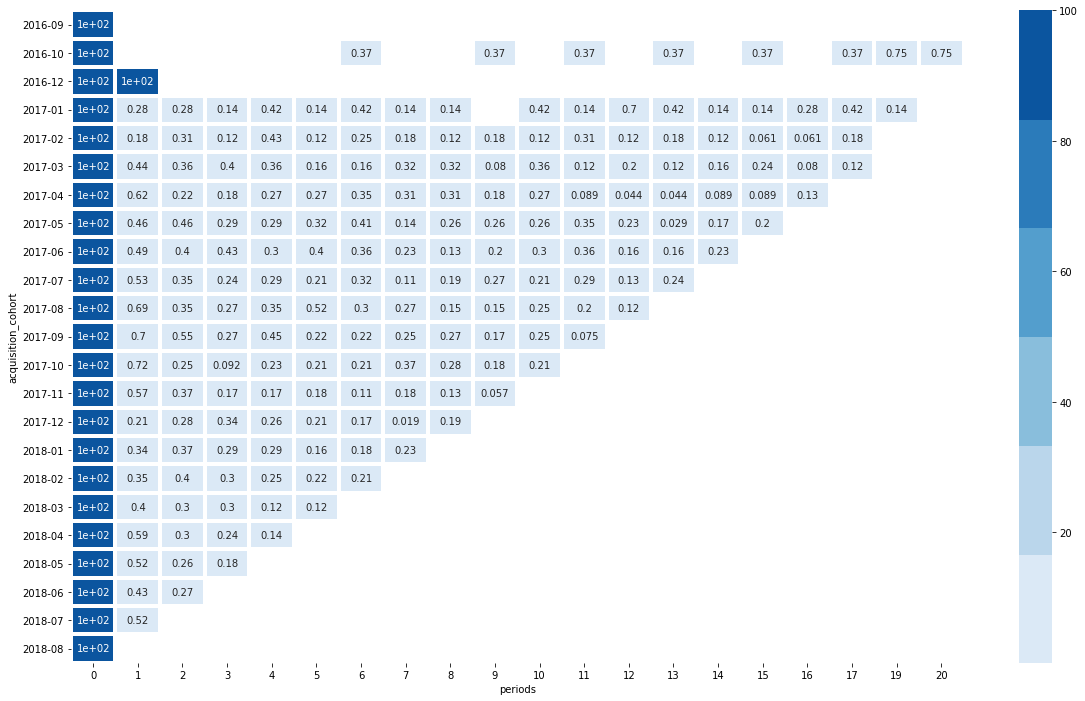

In [79]:
# Строим heatmap:

cmap = sns.color_palette("Blues")
f, ax = plt.subplots(figsize=(20, 12))

sns.heatmap(df_mat, 
            annot=True, 
            linewidths=3, 
            cmap=cmap, 
            ax=ax,
            square=False)

***Ответ:*** исходя из heatmap (см. в ячейке выше), самый высокий retention за месяц под номером 3 составляет 0.41 (когорта приобретения (acquisition_cohort) 2017-06).

## ***Задание 6:***

#### Примечание 1.
Интерпретация RFM-score: 1 - самый плохой, 5 - самый хороший.

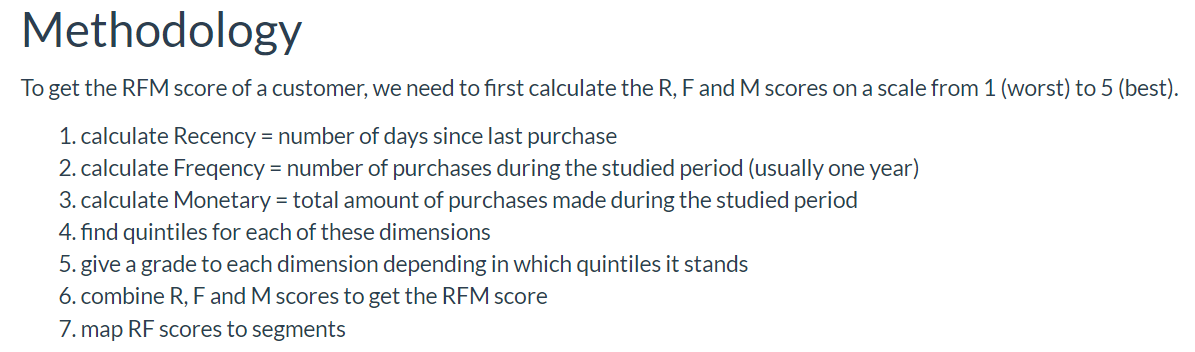

In [88]:
coi = customers.merge(orders[~orders['order_delivered_customer_date'].isna()], on='customer_id') \
    .merge(items.groupby('order_id', as_index=False)['price'].sum(), on='order_id')
coi.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month,order_purchase_weekday,weeks_in_month,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,May 2017,Tuesday,4.43,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,January 2018,Friday,4.43,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,May 2018,Saturday,4.43,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,March 2018,Tuesday,4.43,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,July 2018,Sunday,4.43,230.00


In [89]:
rfm = coi.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
rfm.head()

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [90]:
# Вычисляем максимальную (последнюю) и минимальную (первую) дату заказа:

print(f'max: {max(coi["order_purchase_timestamp"])}\nmin: {min(coi["order_purchase_timestamp"])}')

max: 2018-08-29 15:00:37
min: 2016-09-15 12:16:38


In [91]:
# Т.к. данные у нас за 2016-2018 г. г. (которые были давно), то из даты последнего заказа (+ 1 день, на всякий случай) вычитаем 
# каждую строку и переводим в дни:

rfm['days_since_order'] = rfm['order_purchase_timestamp'].apply(lambda row: (pd.to_datetime('2018-08-30 15:00:37') - row).days)

In [92]:
rfm['total_orders'] = coi.groupby('customer_unique_id', as_index=False)['order_status'].count()['order_status']

In [93]:
rfm['total_spents'] = coi.groupby('customer_unique_id', as_index=False)['price'].sum()['price']

In [94]:
rfm = rfm.rename(columns={ \
    'days_since_order': '(r)_days_since_order', \
    'total_orders': '(f)_total_orders', \
    'total_spents': '(m)_total_spents' \
})

rfm = rfm[['customer_unique_id', '(r)_days_since_order', '(f)_total_orders', '(m)_total_spents']]

In [95]:
rfm.sort_values('(f)_total_orders', ascending=False).head()

,customer_unique_id,(r)_days_since_order,(f)_total_orders,(m)_total_spents
51429,8d50f5eadf50201ccdcedfb9e2ac8455,9,15,714.63
22775,3e43e6105506432c953e165fb2acf44c,183,9,1000.85
73920,ca77025e7201e3b30c44b472ff346268,90,7,806.61
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,197,7,809.21
36703,6469f99c1f9dfae7733b25662e7f1782,63,7,664.20


In [96]:
rfm['(r)_days_since_order'].describe()

count    93356.000000
mean       237.973842
std        152.621155
min          1.000000
25%        114.000000
50%        219.000000
75%        346.000000
max        714.000000
Name: (r)_days_since_order, dtype: float64

In [97]:
rfm['(f)_total_orders'].describe()

count    93356.00000
mean         1.03342
std          0.20910
min          1.00000
25%          1.00000
50%          1.00000
75%          1.00000
max         15.00000
Name: (f)_total_orders, dtype: float64

In [98]:
# Заметим, что в f-score все очень плохо с разнообразием количества заказов - подавляющее большинство пользователей
# совершили всего 1 покупку.

In [99]:
rfm['(m)_total_spents'].describe()

count    93356.000000
mean       141.618055
std        215.696124
min          0.850000
25%         47.650000
50%         89.700000
75%        154.692500
max      13440.000000
Name: (m)_total_spents, dtype: float64

In [100]:
rfm.head()

,customer_unique_id,(r)_days_since_order,(f)_total_orders,(m)_total_spents
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90
2,0000f46a3911fa3c0805444483337064,537,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00


In [101]:
# Теперь используем разбиение по квантилям:

quantiles = rfm[['(r)_days_since_order', '(f)_total_orders', '(m)_total_spents']].quantile([.2, .4, .6, .8]).to_dict()

In [102]:
pd.DataFrame(quantiles)

,(r)_days_since_order,(f)_total_orders,(m)_total_spents
0.2,92.0,1.0,39.9
0.4,177.0,1.0,69.9
0.6,268.0,1.0,109.9
0.8,382.0,1.0,179.9


In [103]:
len(list(rfm['(f)_total_orders'].unique()))

9

In [104]:
# Из колонки (f)_total_orders таблицы quantiles понимаем, что разбиение f-score по квантилям - не лучший вариант, поэтому 
# будем разбивать по конкретным значениям (из которых уникальных всего 9).

In [105]:
def do_rfm_thing(v, c):
    if c == '(m)_total_spents':
        if v <= quantiles[c][.2]:
            return 1
        elif v <= quantiles[c][.4]:
            return 2
        elif v <= quantiles[c][.6]:
            return 3
        elif v <= quantiles[c][.8]:
            return 4
        else:
            return 5
    elif c == '(f)_total_orders':
        if v <= 1:
            return 1
        elif v <= 2:
            return 2
        elif v <= 3:
            return 3
        elif v <= 4:
            return 4
        else:
            return 5
    else:
        if v <= quantiles[c][.2]:
            return 5
        elif v <= quantiles[c][.4]:
            return 4
        elif v <= quantiles[c][.6]:
            return 3
        elif v <= quantiles[c][.8]:
            return 2
        else:
            return 1

In [106]:
rfm['r'] = rfm['(r)_days_since_order'].apply(lambda row: do_rfm_thing(row, '(r)_days_since_order'))
rfm['f'] = rfm['(f)_total_orders'].apply(lambda row: do_rfm_thing(row, '(f)_total_orders'))
rfm['m'] = rfm['(m)_total_spents'].apply(lambda row: do_rfm_thing(row, '(m)_total_spents'))

In [107]:
rfm['rfm_score'] = rfm['r'].map(str) + rfm['f'].map(str) + rfm['m'].map(str)

In [108]:
rfm.head()

,customer_unique_id,(r)_days_since_order,(f)_total_orders,(m)_total_spents,r,f,m,rfm_score
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,1,1,411
2,0000f46a3911fa3c0805444483337064,537,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,2,1,5,215


In [109]:
# Проверяем, что значения r, f и m выставлены верно, везде присутсвуют числа 1-5, нигде ничего не потеряно

print(f'r: {sorted(list(rfm.r.unique()))} \nf: {sorted(list(rfm.f.unique()))} \nm: {sorted(list(rfm.f.unique()))}')

r: [1, 2, 3, 4, 5] 
f: [1, 2, 3, 4, 5] 
m: [1, 2, 3, 4, 5]


In [110]:
chosen_segment = rfm.query('rfm_score == "123"')

In [111]:
chosen_segment.head()

,customer_unique_id,(r)_days_since_order,(f)_total_orders,(m)_total_spents,r,f,m,rfm_score
305,00cc12a6d8b578b8ebd21ea4e2ae8b27,526,2,99.80,1,2,3,123
1331,0396c443fdda5498c7e9ed5b34871c5a,482,2,85.89,1,2,3,123
2722,076b7055bea51da430d6a6fa054e5075,446,2,87.90,1,2,3,123
2919,07f61caa1c9e850c14e94854cec87545,390,2,80.80,1,2,3,123
7223,13abc50b97af7425b5066e405d7cd760,479,2,94.90,1,2,3,123


In [112]:
chosen_segment.describe()

,(r)_days_since_order,(f)_total_orders,(m)_total_spents,r,f,m
count,57.000000,57.0,57.000000,57.0,57.0,57.0
mean,453.614035,2.0,89.079825,1.0,2.0,3.0
std,56.009806,0.0,11.546765,0.0,0.0,0.0
min,383.000000,2.0,69.990000,1.0,2.0,3.0
25%,408.000000,2.0,79.800000,1.0,2.0,3.0
50%,445.000000,2.0,87.900000,1.0,2.0,3.0
75%,482.000000,2.0,95.990000,1.0,2.0,3.0
max,585.000000,2.0,109.890000,1.0,2.0,3.0


### Описание результатов:

RFM-сегмент 123 (recency = 1, frequency = 2, monetary = 3) имеет границы метрик recency от 383 до 585 дня, frequency 
только 2 заказа за все время, monetary от 69.9 до 109.9 у. е. за все время (у. е. - условные единицы).

Схема выполнения была взята [отсюда](https://guillaume-martin.github.io/rfm-segmentation-with-python.html), и еще [отсюда](https://aainabajaj39.medium.com/rfm-analysis-for-successful-customer-segmentation-using-python-6291decceb4b).

***Ответ:*** см. в ячейке выше.